In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense

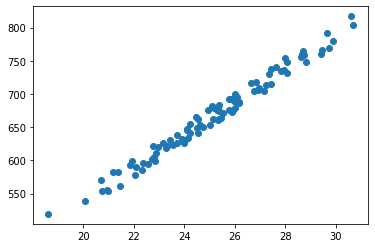

In [2]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

In [3]:
data

,area,price
0,29.410131,760.253272
1,26.000393,679.009826
2,27.446845,738.171124
3,30.602233,817.055825
4,29.668895,791.722374
...,...,...
95,26.766433,705.160823
96,25.026250,652.656251
97,29.464676,766.616906
98,25.317280,678.932006


In [4]:
data = (data-data.min())/(data.max()-data.min())

In [5]:
data

,area,price
0,0.895142,0.809143
1,0.612337,0.536163
2,0.732307,0.734946
3,0.994016,1.000000
4,0.916604,0.914879
...,...,...
95,0.675873,0.624031
96,0.531542,0.447615
97,0.899666,0.830524
98,0.555680,0.535902


In [7]:
model = K.Sequential([Dense(1,input_shape =[1,], activation=None)])
model.summary()
                      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [10]:
model.fit(x=data['area'],y=data['price'], epochs=100, batch_size=32,verbose=1, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 60ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 11/100
3/3 [=

In [11]:
y_pred = model.predict(data['area'])

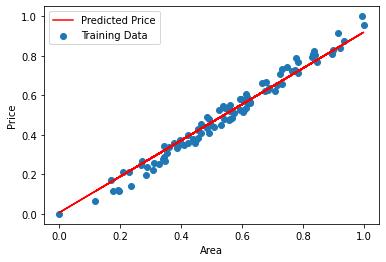

In [12]:
plt.plot(data['area'], y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

In [13]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.912014]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00682114], dtype=float32)>]